In [1]:
from sklearn import datasets

In [2]:
digits = datasets.load_digits()

In [5]:
print(digits.data.shape)
digits.data

(1797, 64)


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [13]:
print(digits.images.shape)
digits.images[0]

(1797, 8, 8)


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

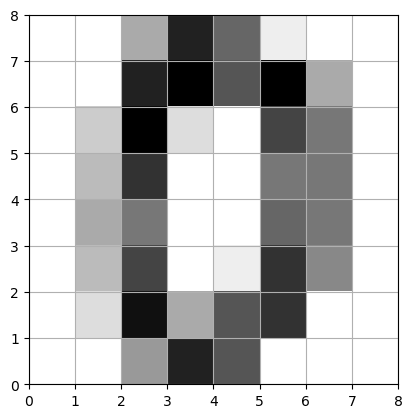

In [15]:
import matplotlib.pylab as plt

plt.style.use('default')
plt.grid()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest', extent=(0, 8, 0, 8))

In [16]:
from sklearn import svm

clf = svm.SVC(gamma=0.001, C=100.)

In [17]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, gamma=0.001)

In [19]:
clf.predict(digits.data[-1:])

array([8])

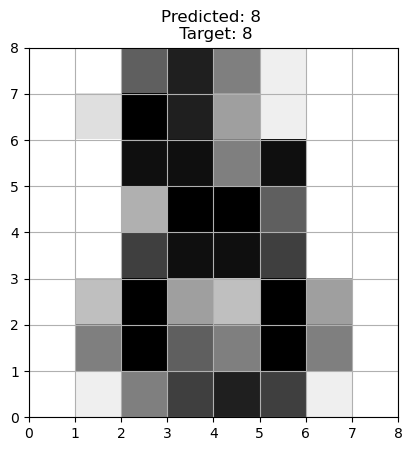

In [27]:
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest', extent=(0, 8, 0, 8))
plt.grid()
_ = plt.title(f'Predicted: {clf.predict(digits.data[-1:])[0]} \n Target: {digits.target[-1]}')

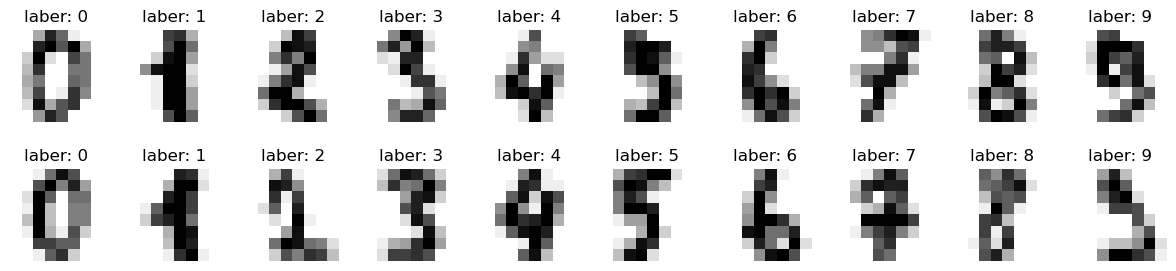

In [36]:
plt.figure(figsize=(15, 3))
images_and_labels = list(zip(digits.images, digits.target))
nrows, ncols =2, 10
for index, (image, label) in enumerate(images_and_labels[:20]):
    plt.subplot(nrows, ncols, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'laber: {label}')
plt.subplots_adjust(hspace=0.5)

In [37]:
classifier = svm.SVC(gamma=0.001)

In [43]:
half_samples = len(digits.images) // 2
classifier.fit(digits.data[:half_samples], digits.target[:half_samples])

SVC(gamma=0.001)

In [44]:
expected = digits.target[half_samples:]
predicted = classifier.predict(digits.data[half_samples:])

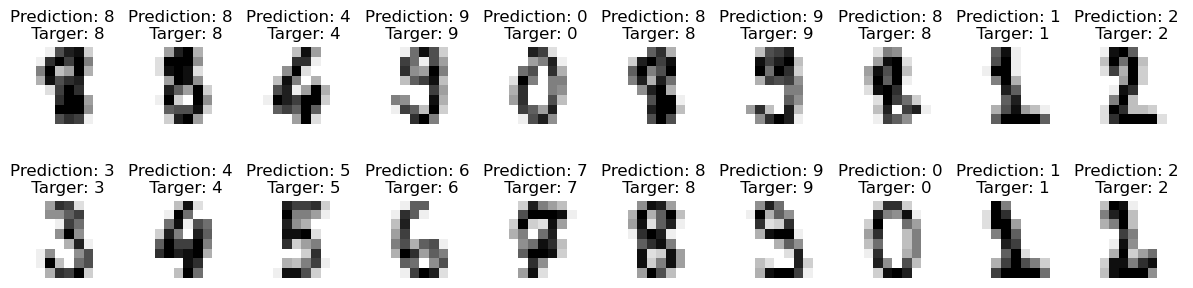

In [51]:
plt.figure(figsize=(15, 3))
images_prediction_targets = list(zip(digits.images[half_samples:], predicted, expected))
for index, (image, prediction, target) in enumerate(images_prediction_targets[:20]):
    plt.subplot(nrows, ncols, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Prediction: {prediction} \n Targer: {target}')
plt.subplots_adjust(hspace=1)

In [54]:
from sklearn import metrics
print(f'{classifier} \n {metrics.classification_report(expected, predicted)}')

SVC(gamma=0.001) 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



In [55]:
metrics.accuracy_score(expected, predicted)

0.9688542825361512

In [56]:
metrics.precision_score(expected, predicted, average=None)

array([1.        , 0.98876404, 0.98837209, 0.97530864, 0.98876404,
       0.94623656, 0.98901099, 0.95652174, 0.93617021, 0.92783505])

In [58]:
metrics.precision_score(expected, predicted, average='macro')

0.9696983376479764

In [59]:
metrics.precision_score(expected, predicted, average='weighted')

0.9696092010839529

In [62]:
print(metrics.recall_score(expected, predicted, average=None))
print(metrics.recall_score(expected, predicted, average='macro'))
print(metrics.recall_score(expected, predicted, average='weighted'))

[0.98863636 0.96703297 0.98837209 0.86813187 0.95652174 0.96703297
 0.98901099 0.98876404 1.         0.97826087]
0.9691763901507882
0.9688542825361512


In [63]:
print(f'Confusion Matrix \n {metrics.confusion_matrix(expected, predicted)}')

Confusion Matrix 
 [[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]
